In [2]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import numpy as np


iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
#Turning the dataset into a table
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"] = iris.target
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Making the names consistent in the dataset
iris_data.rename(columns = {'sepal length (cm)':'sepal_length','sepal width (cm)': 'sepal_width', 'petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace=True)

In [6]:
# Adding a column to name the species
iris_data["target_names"] = iris.target
iris_data["target_names"].replace({0: 'setosa', 1:'versicolor',2:'virginica'}, inplace=True)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
# visualizing the data using seaborn
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.02, 'Pair Plot for the Iris Species Dataset')

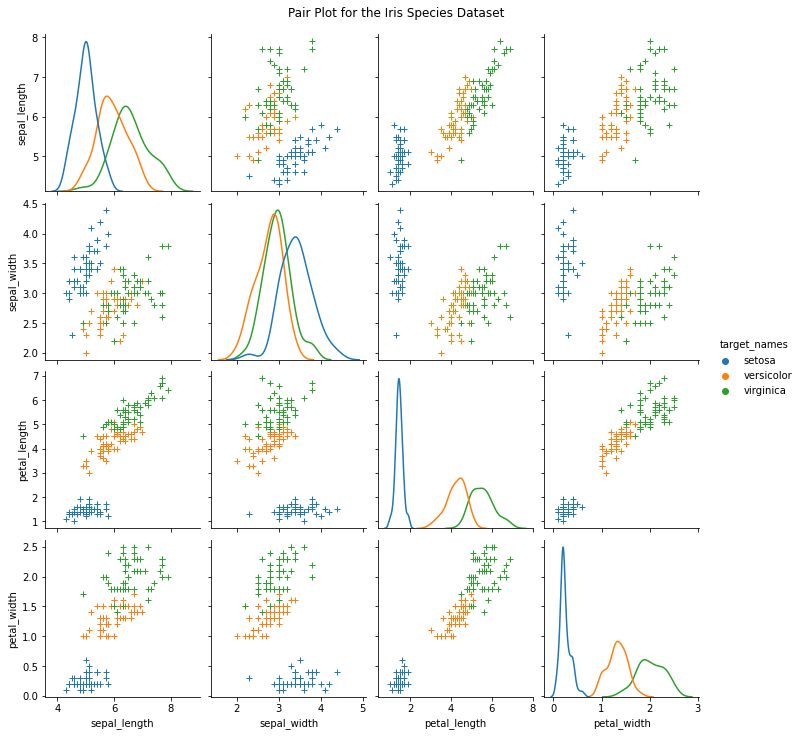

In [8]:
# Pair plot to visualize all the features at once
p = sns.pairplot(iris_data[['sepal_length', 'sepal_width', 'target_names','petal_length', 'petal_width']],plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False), hue = 'target_names')

p.fig.suptitle("Pair Plot for the Iris Species Dataset", y=1.02)



In [143]:
# Correlation to find out how strong the features are related to each other
iris_data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [144]:
# Python implementation of Pearson Correlation
def pearson_coef(x, y):
    # Assume len(x) == len(y)
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(map(lambda x: x**2, x))
    sum_y_sq = sum(map(lambda x: x**2, y))
    psum = sum(map(lambda x, y: x*y, x, y))
    num = psum - (sum_x * sum_y/n)
    den = np.sqrt((sum_x_sq - sum_x**2 / n)* (sum_y_sq - sum_y**2 / n))
    if den == 0: return 0
    return num / den



In [145]:
# Verifying the dataset with pearson correlation
pearson_coef(iris_data['sepal_length'], iris_data['petal_width'])
pearson_coef(iris_data['petal_length'], iris_data['petal_width'])
pearson_coef(iris_data['sepal_width'], iris_data['petal_width'])


-0.36612593253645903

<AxesSubplot:>

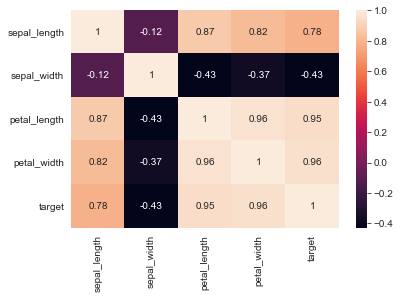

In [146]:
# Plotting a heatmap
sns.heatmap(iris_data.corr(), annot=True)

In [147]:
# Removing the feature 'sepal_width' from the dataset
iris_data.drop(columns=['sepal_width'], inplace=True)
iris_data.head()

,sepal_length,petal_length,petal_width,target,target_names
0,5.1,1.4,0.2,0,setosa
1,4.9,1.4,0.2,0,setosa
2,4.7,1.3,0.2,0,setosa
3,4.6,1.5,0.2,0,setosa
4,5.0,1.4,0.2,0,setosa


Text(0.5, 1.02, 'Pair Plot for the Iris Species Dataset')

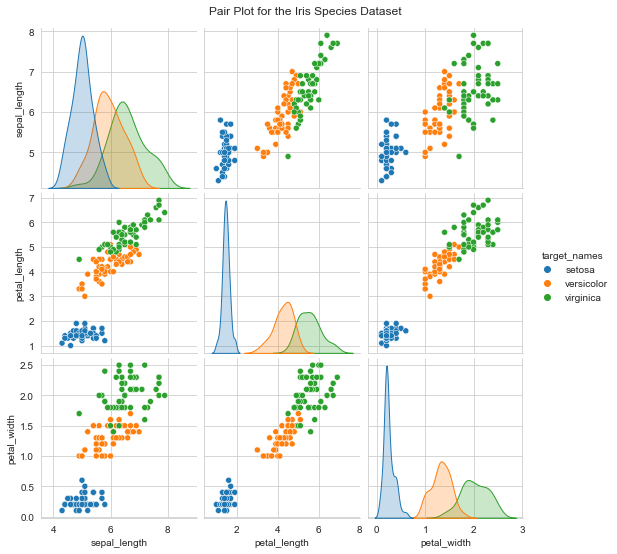

In [148]:
# Pair plot to see the changes and confirm our hypothesis
pp = sns.pairplot(iris_data[['sepal_length','target_names','petal_length','petal_width']], hue="target_names")
pp.fig.suptitle("Pair Plot for the Iris Species Dataset", y=1.02)


In [149]:
# Splitting the dataset into a 3:1 train to test ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal_length', 'petal_length','petal_width']],iris_data[['target']], test_size=0.33, random_state=1)
print(iris_data.shape)
X_train.shape,X_test.shape,y_train.shape, y_test.shape




(150, 5)


((100, 3), (50, 3), (100, 1), (50, 1))

In [150]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)


C:\Users\olatu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

1    19
0    17
2    14
Name: target, dtype: int64


C:\Users\olatu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


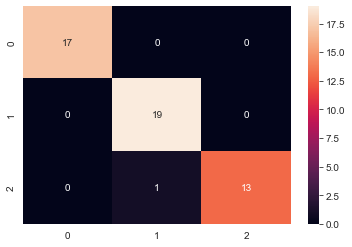

In [151]:
# confusion matrix for the test of the dataset
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)

print(y_test['target'].value_counts())
      

C:\Users\olatu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\olatu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\olatu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\olatu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\olatu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversio

<Figure size 432x288 with 0 Axes>

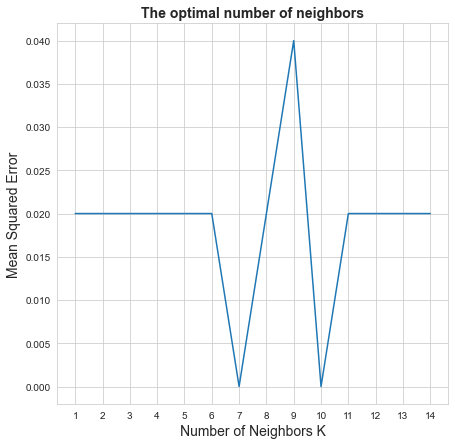

In [152]:
# Tuning the model, to find the optimal vlaue of k
import matplotlib.pyplot as plt
from sklearn import metrics

# try K=1 through to K=25 and record testing accuracy
k_range = range(1,15)
mse = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    mse.append(metrics.mean_squared_error(y_test, knn.predict(X_test)))
plt.figure()
plt.figure(figsize=(7,7))   
plt.title('The optimal number of neighbors', fontsize=14, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
sns.set_style('whitegrid')
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))
plt.plot(k_range, mse)
plt.show()


C:\Users\olatu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\olatu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1    19
0    17
2    14
Name: target, dtype: int64


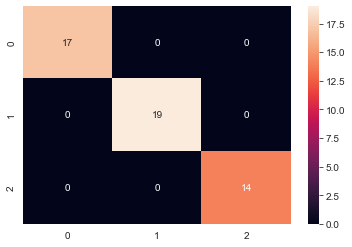

In [153]:
# confusion matrix for the optimal value for k =7
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)

print(y_test['target'].value_counts())

C:\Users\olatu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\olatu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1    19
0    17
2    14
Name: target, dtype: int64


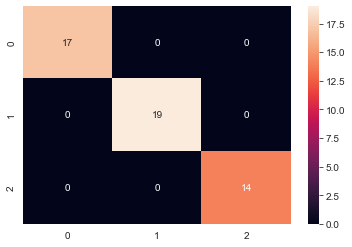

In [154]:
# confusion matrix for the optimal value for k =10
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)

print(y_test['target'].value_counts())